##### Importing libraries for data manipulation and visualization 

In [1]:
# library for linear algebra
import numpy as np
# library for data manipulation 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' 
# library for making graphs  
import matplotlib.pyplot as plt
%matplotlib inline
# library for making pretty graphs 
import seaborn as sns

In [2]:
# Reading the .csv file as a dataframe 
df = pd.read_csv("IPL.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

##### Making a seperate dataframe consisting only of Mumbai Indians Players.

In [4]:
# Getting only players from Mumbai Indians 
mumbaiIndians = df[df['batting_team'] == 'Mumbai Indians']

In [5]:
mumbaiIndians.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
692,335985,1,0,2,L Ronchi,ST Jayasuriya,P Kumar,4,0,4,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
693,335985,1,0,1,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
694,335985,1,0,6,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore


#####  Batsmen representing Mumbai Indians from 2018-2020

In [6]:
print(mumbaiIndians['batsman'].unique())

['L Ronchi' 'ST Jayasuriya' 'DJ Thornely' 'RV Uthappa' 'PR Shah'
 'AM Nayar' 'SM Pollock' 'Harbhajan Singh' 'DJ Bravo' 'A Nehra' 'MA Khote'
 'SS Tiwary' 'DS Kulkarni' 'AM Rahane' 'MK Pandey' 'YV Takawale' 'RR Raje'
 'SR Tendulkar' 'DR Smith' 'SD Chitnis' 'CRD Fernando' 'VS Yeligati'
 'S Dhawan' 'JP Duminy' 'Z Khan' 'GR Napier' 'SL Malinga' 'C Nanda'
 'Mohammad Ashraful' 'AP Tare' 'AT Rayudu' 'R Sathish' 'R McLaren'
 'KA Pollard' 'AN Ahmed' 'C Madan' 'STR Binny' 'RG Sharma' 'DJ Jacobs'
 'A Symonds' 'JEC Franklin' 'AG Murtaza' 'AC Blizzard' 'TL Suman'
 'MM Patel' 'RE Levi' 'KD Karthik' 'SA Yadav' 'PP Ojha' 'CJ McKay'
 'RP Singh' 'NLTC Perera' 'RJ Peterson' 'HH Gibbs' 'RT Ponting' 'R Dhawan'
 'MG Johnson' 'GJ Maxwell' 'NM Coulter-Nile' 'CM Gautam' 'CJ Anderson'
 'MEK Hussey' 'JJ Bumrah' 'BR Dunk' 'LMP Simmons' 'S Gopal' 'M de Lange'
 'P Kumar' 'AJ Finch' 'J Suchith' 'PA Patel' 'UBT Chand' 'R Vinay Kumar'
 'HH Pandya' 'MJ McClenaghan' 'JC Buttler' 'KH Pandya' 'TG Southee'
 'MJ Guptill' 'N 

##### Visualizing null values in the dataframe

<AxesSubplot:>

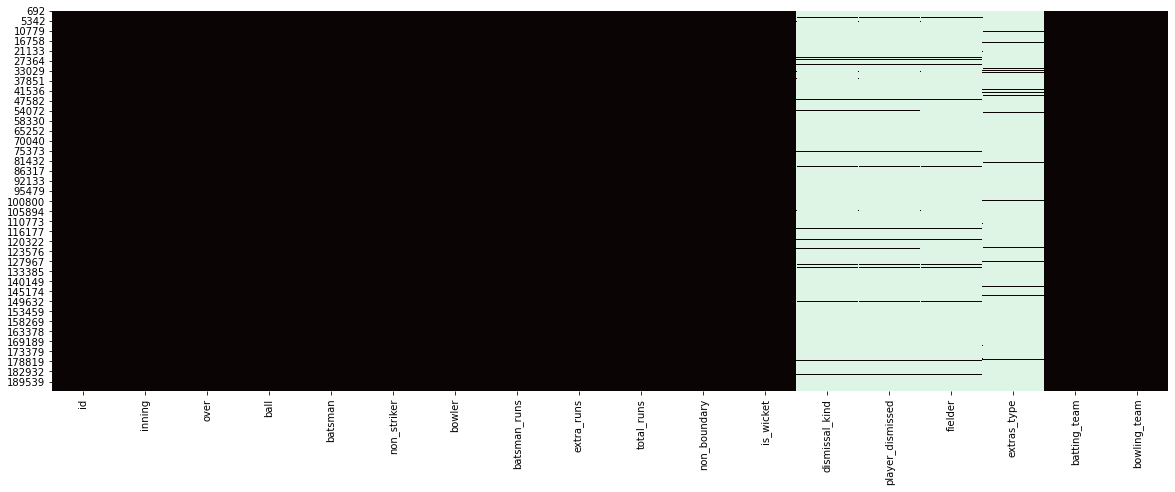

In [7]:
plt.figure(figsize=(20,7))
# blue represents all the NULL rows in DataFrame
sns.heatmap(mumbaiIndians.isnull(), cmap = 'mako', cbar = False)

#### Do players score more runs on specific innings ?

The function below creates a dataframe consisting of players' average runs scored on 1st and 2nd innings. <br>


In [8]:
def avgRunsPerInnings(mumbaiIndians):
    
    players = mumbaiIndians['batsman'].unique()
    data = []
    
    for player in players:
        
        # Get the player name and their total runs in that specific innings 
        inningsPlayed = mumbaiIndians[mumbaiIndians['batsman'] == player][['id','inning','total_runs']]
        
        # first innings played
        FIP = inningsPlayed[inningsPlayed['inning'] == 1]['id'].unique()
        # second innings played 
        SIP = inningsPlayed[inningsPlayed['inning'] == 2]['id'].unique()
    
        # A list that stores sum of total runs made in first innings by a player  
        emptyList1 = []
        # A list that stores sum of total runs made in second innings by a player  
        emptyList2 = []
    
        if len(FIP) > 1:
            emptyList1*len(FIP)
        if len(SIP) > 1:
            emptyList2*len(SIP)
        
        for ID in FIP:
            emptyList1.append((inningsPlayed[inningsPlayed['id'] == ID]['total_runs']).sum())
        
        for ID in SIP:
            emptyList2.append((inningsPlayed[inningsPlayed['id'] == ID]['total_runs']).sum())
        
        # calculates the average runs scored by the same on a specific innings 
        if len(emptyList1) > 0 and len(emptyList2) > 0:
            average1 = sum(emptyList1)/len(emptyList1)
            average2 = sum(emptyList2)/len(emptyList2)
    
        data.append([player, average1, average2])
        
    outputdf = pd.DataFrame(data, columns = ['player','average_in_1st_innings','average_in_2nd_innings'])
    return outputdf       

In [9]:
# parpi = player average runs per innings 
player = avgRunsPerInnings(mumbaiIndians)
player1 = player.sort_values(by=['average_in_1st_innings'], ascending=False)
player2 = player.sort_values(by=['average_in_2nd_innings'], ascending=False)

In [10]:
player.head()

,player,average_in_1st_innings,average_in_2nd_innings
0,L Ronchi,7.333333,7.500000
1,ST Jayasuriya,28.352941,27.769231
2,DJ Thornely,17.333333,1.000000
3,RV Uthappa,24.000000,27.000000
4,PR Shah,12.600000,12.000000


In [11]:
print("Players scored a total of", (player['average_in_1st_innings'].sum()),"in first innings and", 
      (player['average_in_2nd_innings'].sum()), "in the second innings. One of my recommendations to the coach would be to advice the captain to choose to bat when they win the coin toss as it may prevent the team from narrowest loss margins. Some examples include loss with 1 run against KXIP, loss with 2 runs against RR, RCB and, loss with 3 runs against KXIP and RPS.") 

Players scored a total of 1553.4209270172066 in first innings and 1534.588958303395 in the second innings. One of my recommendations to the coach would be to advice the captain to choose to bat when they win the coin toss as it may prevent the team from narrowest loss margins. Some examples include loss with 1 run against KXIP, loss with 2 runs against RR, RCB and, loss with 3 runs against KXIP and RPS.


##### Which players perform better in 1st innings?

AxesSubplot(0.125,0.125;0.775x0.755)


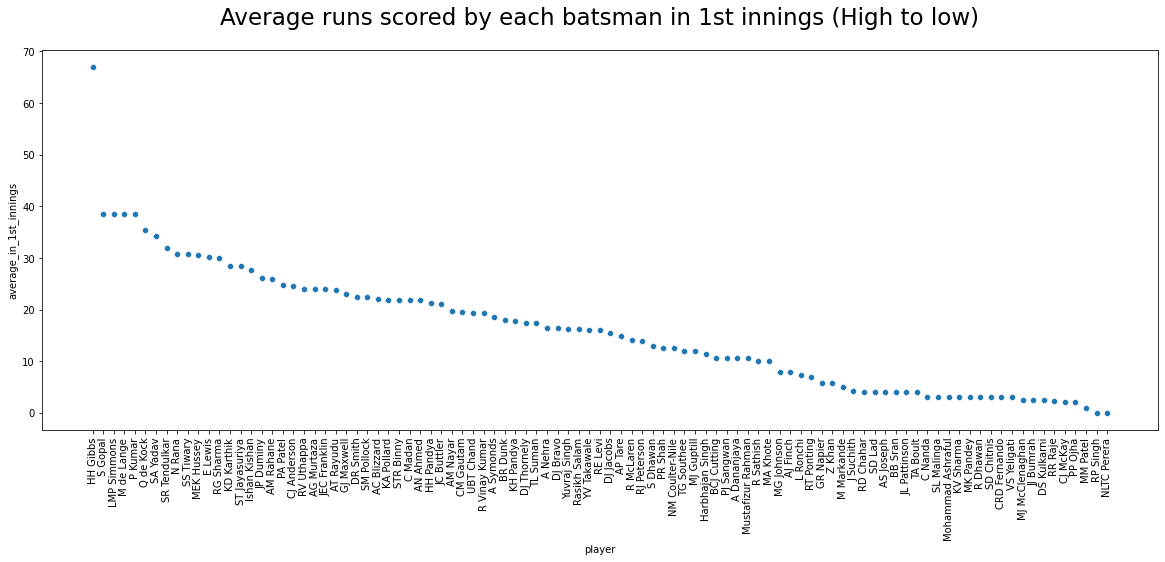

In [12]:
plt.figure(figsize=(20,7))
p1 = sns.scatterplot(x = 'player',y='average_in_1st_innings',data = player1)
plt.setp(p1.get_xticklabels(),rotation=90)
p1.set_title('Average runs scored by each batsman in 1st innings (High to low)', fontsize = 23, y =1.05);
print(p1)

##### Which players perform better in 2nd innings?

AxesSubplot(0.125,0.125;0.775x0.755)


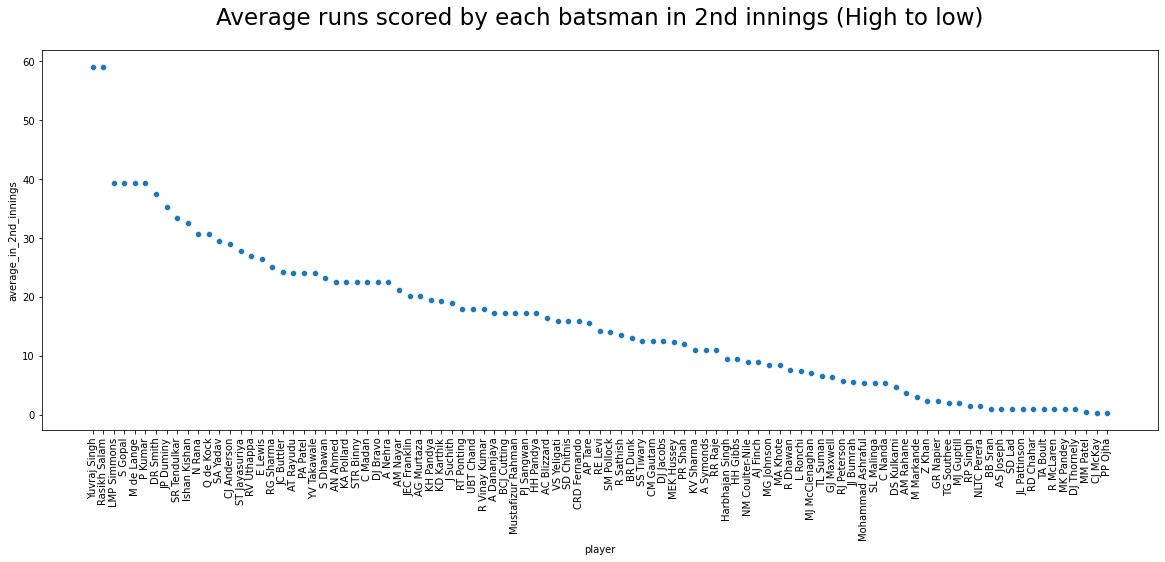

In [13]:
plt.figure(figsize=(20,7))
p2 = sns.scatterplot(x = 'player',y='average_in_2nd_innings',data = player2)
plt.setp(p2.get_xticklabels(), rotation=90)
p2.set_title('Average runs scored by each batsman in 2nd innings (High to low)', fontsize = 23, y =1.05);
print(p2) 

In [14]:
player[player['player'] == 'SR Tendulkar'] 

,player,average_in_1st_innings,average_in_2nd_innings
17,SR Tendulkar,31.857143,33.305556


* One of my recommendations would be to look at averages of each players for the two innings and accordingly consider using the batsman. 

###### As shown in the plots above, players who have played less than 5 games could potentially skew the data (Few examples of the outliers include Yuvraj Singth, DJ Thomely, HH Gibbs)

##### ++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++----++++

### Calculating average runs/ball for each batsman

In [15]:
# query the columns id, inning played and the name of the batsman
batsman = mumbaiIndians.groupby(['id','inning','batsman'])
# calculate total runs made by the batsman
batsman = batsman['total_runs'].sum().reset_index() 
# make another table called "batsmen" that selects batsman name and the match he played
batsmen = df.pivot_table(index=['batsman','id'], aggfunc='size')
# reset index to get a dataframe that can be merged with batsman
batsmen = batsmen.reset_index()
# rename the columns in order to perform the merge 
batsmen.columns = ['batsman','id','total_balls_played'] 

In [16]:
# merge batsman and batsmen 
z = batsman.merge(batsmen, on=['batsman','id'], how='outer')

In [17]:
z['average_runs/ball']= z['total_runs']/z['total_balls_played']

In [18]:
z = z.sort_values(by='average_runs/ball', ascending=False)
z[z['total_balls_played'] > 20] 

,id,inning,batsman,total_runs,total_balls_played,average_runs/ball
1264,1136601,1.0,Ishan Kishan,63.0,22,2.863636
1380,1178422,2.0,HH Pandya,96.0,34,2.823529
1490,1216541,1.0,HH Pandya,61.0,22,2.772727
64,336021,2.0,ST Jayasuriya,57.0,21,2.714286
1341,1178399,2.0,KA Pollard,87.0,33,2.636364
...,...,...,...,...,...,...
12127,1082591,NaN,Yuvraj Singh,NaN,30,NaN
12134,1082630,NaN,Yuvraj Singh,NaN,43,NaN
12135,1082634,NaN,Yuvraj Singh,NaN,44,NaN
12138,1136562,NaN,Yuvraj Singh,NaN,22,NaN


In [19]:
print("My second recommmendation would be to reatain the following players who have acheived an average run/ball ratio of greater than 2.5",z[z['average_runs/ball']>2.5]['batsman'].unique())

My second recommmendation would be to reatain the following players who have acheived an average run/ball ratio of greater than 2.5 ['AP Tare' 'KH Pandya' 'AT Rayudu' 'KA Pollard' 'HH Pandya'
 'Harbhajan Singh' 'SL Malinga' 'RG Sharma' 'YV Takawale' 'KV Sharma'
 'SA Yadav' 'MJ McClenaghan' 'Ishan Kishan' 'ST Jayasuriya' 'CJ Anderson'
 'DR Smith' 'Z Khan' 'SD Chitnis' 'JC Buttler' 'AM Nayar']


AxesSubplot(0.125,0.125;0.775x0.755)


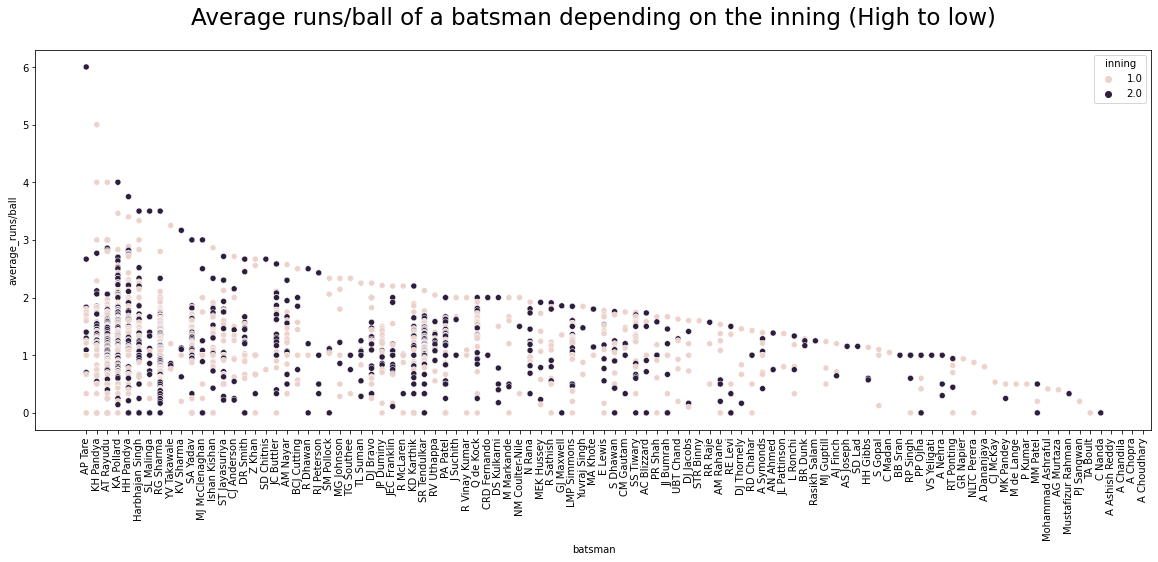

In [20]:
plt.figure(figsize=(20,7))
p3 = sns.scatterplot(data = z, x = 'batsman', y = 'average_runs/ball', hue = 'inning')
plt.setp(p3.get_xticklabels(), rotation = 90)
p3.set_title('Average runs/ball of a batsman depending on the inning (High to low)', fontsize = 23, y =1.05);
print(p3)

##### Checking a player's strike rate depending on the batting_order

In [21]:
# First step is to get a players batting order
# In every match (id) every player is replaced by a new one after a wicket 
# We can make a function that groups a player's inning, over and balls played (after sorting) and keeps tracks of repetitions
#    to get when exactly was a player's last ball - This allows us to get his batting order 
#
# query the dataframe on id, inning, over, ball, batsman_runs, and sort them
sortGameStats = mumbaiIndians[['id','inning','over','ball','batsman_runs']].sort_values(by = ['id','inning','over','ball'])
player_name = {}
counter = 1
# every game
for i in sortGameStats['id'].unique():
    # every numer of innings 
    for j in range(1,3):
        sortGameStats = mumbaiIndians.query("id == @i and inning == @j").sort_values(by = ['inning','over','ball'])
        # every game
        for x in range(len(sortGameStats.index)): 
            # add batsman, id and innings if not already in a dictionary
            if (i, j, sortGameStats.batsman.values[x]) not in player_name: 
                player_name.update({(i,j,sortGameStats.batsman.values[x]):counter}) 
                counter += 1 
        # reset counter
        counter = 1 
        
# type(zip) helps create a nested list thats later transformed into a dataframe         
mumbaiIndians['condition'] = tuple(zip(mumbaiIndians.id.values, mumbaiIndians.inning.values, mumbaiIndians.batsman.values))
# create a new column that maps player name with his batting order
mumbaiIndians['batting_order'] = mumbaiIndians.condition.map(player_name)
# drop the initial condition colums to get a cleaner dataframe
mumbaiIndians = mumbaiIndians.drop('condition',axis=1) 
# sort the dataframe mumBaiIndians and its columns 
sortGameStats = mumbaiIndians[np.hstack((mumbaiIndians.columns.values[:6], mumbaiIndians.columns.values[-1], mumbaiIndians.columns.values[6:-1]))]
sortGameStats = sortGameStats.sort_values(by=['inning','over','ball']) 

In [22]:
# Group every batsman and calculate individual total runs scored
total_runs = mumbaiIndians.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
MIplayer_list = total_runs.index 
total_runs = mumbaiIndians.query("batsman in @MIplayer_list").groupby(['batsman','batting_order'])['batsman_runs'].sum().reset_index()
# Group every batsman and calculate total games played 
total_balls = mumbaiIndians.query("batsman in @MIplayer_list").groupby(['batsman','batting_order'])['id'].count().sort_values(ascending=False).reset_index()
# outer join to get a dataframe with both total scores on every match
combine = total_runs.merge(total_balls, on=['batsman','batting_order'], how = 'outer') 
# calculate the strike rate 
combine['strike_rate'] = ((combine.batsman_runs/combine.id)*100) 
combine = combine.drop(['id','batsman_runs'], axis=1) 

In [23]:
combine['batting_order'] = combine['batting_order'].astype('int')
combine['strike_rate'] = combine['strike_rate'].astype('float') 
combine = combine.sort_values(by='strike_rate', ascending=False)

In [24]:
combine.head() 

,batsman,batting_order,strike_rate
47,CJ Anderson,7,257.142857
247,SD Chitnis,8,250.000000
106,JC Buttler,6,241.666667
160,MG Johnson,10,233.333333
288,Z Khan,10,230.000000


AxesSubplot(0.125,0.125;0.775x0.755)


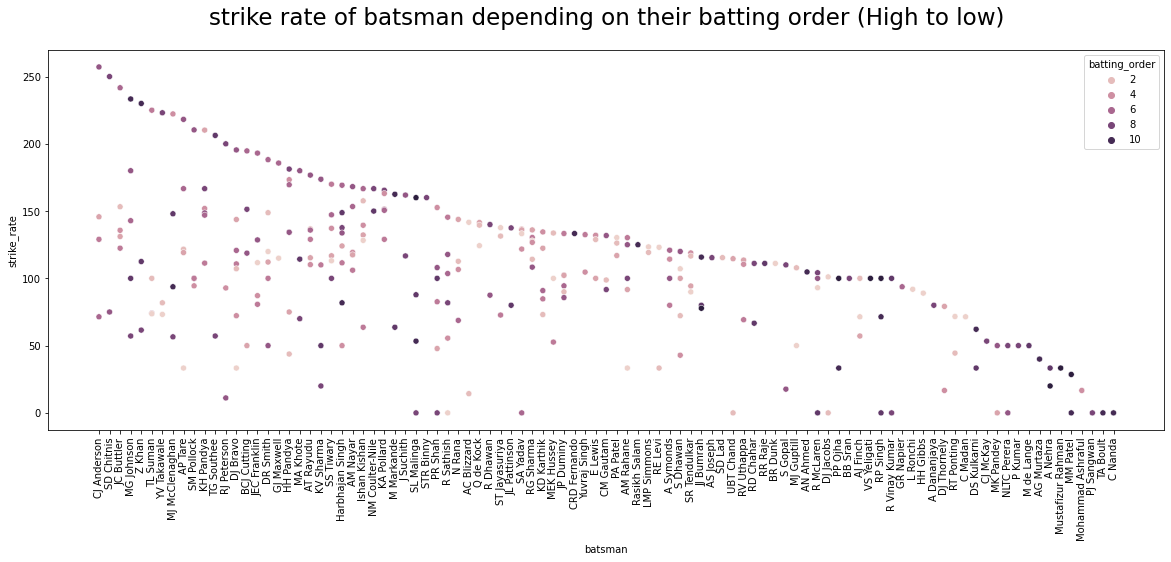

In [25]:
plt.figure(figsize=(20,7))
p4 = sns.scatterplot(data = combine, x = 'batsman', y = 'strike_rate', hue = 'batting_order')
plt.setp(p4.get_xticklabels(), rotation = 90)
p4.set_title('strike rate of batsman depending on their batting order (High to low)', fontsize = 23, y = 1.05);
print(p4) 

Citations: <br>
Referenced code for rotating axis labels - https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot <br>
Referenced pandas syntax for creating plots from this course - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733360#overview <br>
Referenced seaborn documentation for creating heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html <br>
Referenced seaborn plob legend docs - https://www.dataforeverybody.com/seaborn-legend-change-location-size/ <br>
Referenced the logic/syntax of a function made by "pdeepakg" on Kaggle for grouping batting order <br>
sort values syntax from pandas docx - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html <br>
referenced how to change data type in a pandas dataframe columns - https://stackoverflow.com/questions/15891038/change-column-type-in-pandas <br> 
reference grouby docs - https://pandas.pydata.org/docs/user_guide/groupby.html <br>
pandas query documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html